In [1]:
#Import header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the csv file and store it in Dataframe df
df=pd.read_csv('Uber Request Data.csv')

In [3]:
#Check the data
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
#Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
# Check for NA values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
#We do not need to deal with NA values due to below reasons:
#Driver id N/A implies that there were No Cars Available and Hence there is no Driver ID.
#Drop timestamp N/A implies that the trip was not completed due to Cabs not available or Cancellation.
#Hence we proceed further without dealing with these NA values.

In [7]:
#Data Cleaning
#Changing the date to correct format and select dayfirst=True
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"], dayfirst=True) #Dayfirst=true will parse date with the day first
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"], dayfirst=True)

In [8]:
#Check the data again
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [9]:
#Extract data and add additional columns to the dataframe

df['Request Date'] = df["Request timestamp"].dt.date
df['Request Time'] = df["Request timestamp"].dt.time
df['Drop Date'] = df["Drop timestamp"].dt.date
df['Drop Time'] = df["Drop timestamp"].dt.time
df["Request hour"] = df["Request timestamp"].dt.hour

In [10]:
#Check the data again
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8


In [11]:
#Based on the request hours, categorise the requests-
#Early Morning time: 00:00:00 to 04:59:59
#Morning time: 05:00:00 to 08:59:59
#Late Morning time: 09:00:00 to 11:59:59
#Afternoon time: 12:00:00 to 16:59:59
#Evening time: 17:00:00 to 20:59:59
#Night time: 21:00:00 to 23:59:59
df["Time Slot"] = df["Request hour"].apply(lambda x: "Early Morning" if x<5 else "Morning" if x<9 else "Late Morning" if x<12 else "Afternoon" if x<17 else "Evening" if x<21 else "Night")

In [12]:
#Check the data again
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request hour,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,11,Late Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,9,Late Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,2016-07-13,22:28:59,21,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,2016-07-14,07:13:15,6,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,2016-07-15,06:07:52,5,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,2016-07-15,18:50:51,17,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,2016-07-11,07:25:00,6,Morning


In [13]:
#Based on the status of the trip, categorise whether the cab is available or not.
#If Status is 'Trip Completed', then Availability is Y otherwise N
df["Availability"] = df["Status"].apply(lambda x: "Y" if x=="Trip Completed" else "N")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request hour,Time Slot,Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,11,Late Morning,Y
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,17,Evening,Y
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,9,Late Morning,Y
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,21,Night,Y
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8,Morning,Y


In [14]:
#Export the data to csv to create plots in Tableau if needed.
df.to_csv (r'Uber Data-Export.csv', index = None, header=True)

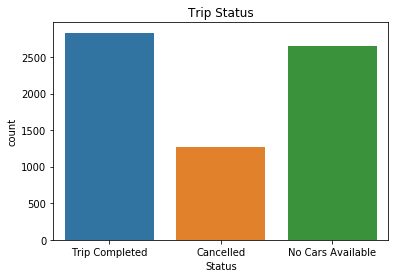

In [15]:
#Plot an overall graph to show the Demand-Supply gap
#A bar chart is chosen as it will clearly show the all the requests' status and can be interpreted easily.
plt.title('Trip Status')
sns.countplot(df['Status'])
#We observe that for ~2500 requests, users were not able to get the cab due to 'No Cars Available'

Text(0, 0.5, '')

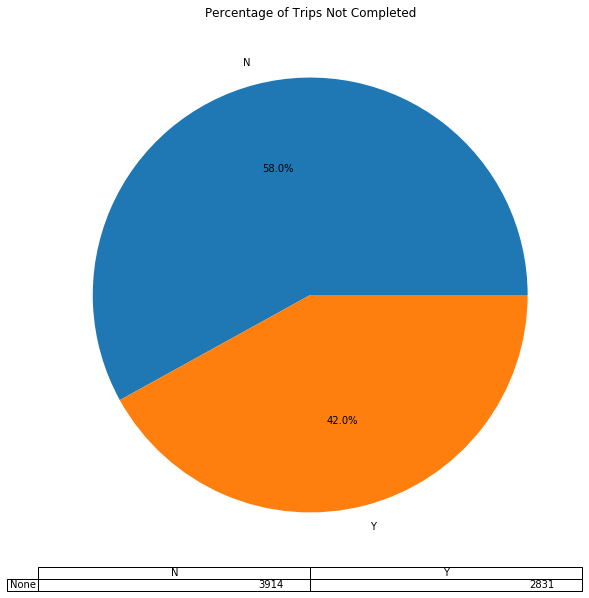

In [16]:
#Calculate the percentage of Not Completed Trips (Cancelled or Not Available):
#Plotted a pie-chart in order to show the percentage clearly.
df.groupby(['Availability']).size().plot(kind="pie",figsize=(10, 10),table=True,autopct='%1.1f%%',title="Percentage of Trips Not Completed")
plt.ylabel("")
#58% of request could not get completed due to different reasons

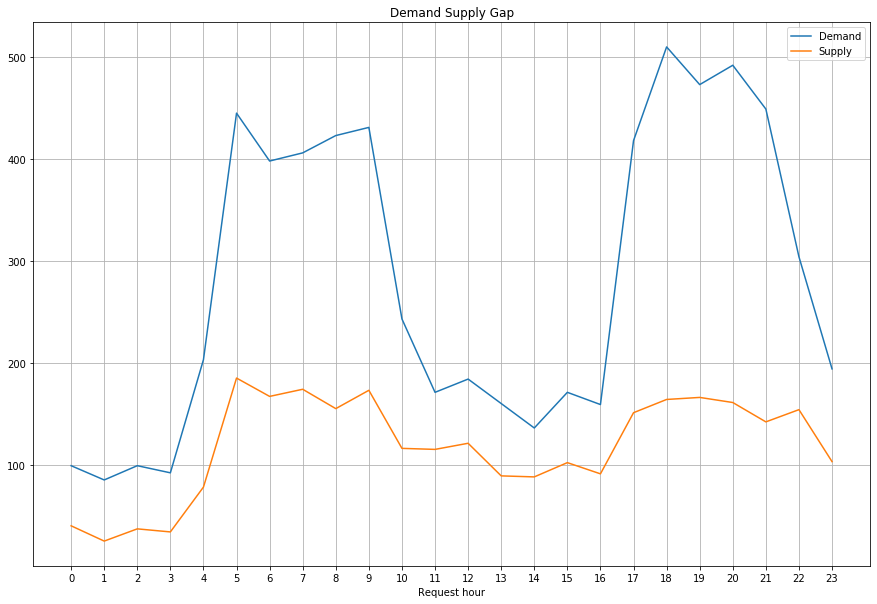

In [17]:
#Let's see the demand supply gap for all the requests during each hour of the day.
# A line chart For Demand-Supply will easily show the gap between demand and supply during different times of the day.
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks([i for i in range(0,24)])
df.groupby(df['Request hour']).count()['Request id'].plot(ax=ax, label='Demand')
df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['Request hour']).count()['Request id'].plot(ax=ax, label='Supply')
plt.grid(True)
plt.title("Demand Supply Gap")
plt.legend()
#Majority of requests are between 17:00 to 21:00 and 05:00 to 09:00

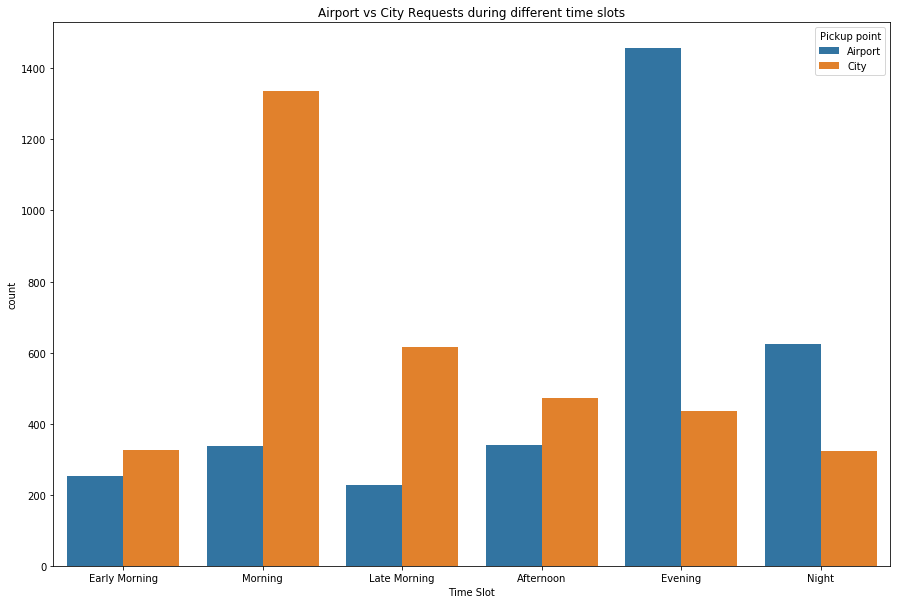

In [18]:
#Let's plot a graph to see whether the majority requests are from Airport or City
plt.subplots(figsize=(15,10))
timeorder = ["Early Morning", "Morning", "Late Morning", "Afternoon", "Evening", "Night"]
plt.title("Airport vs City Requests during different time slots")
sns.countplot(x='Time Slot',hue='Pickup point', order=timeorder, data=df)

#The huge demand in morning hours can be due to large number of departing flights during that time.
#The huge demand in evening hours can be due to large number of incoming flights during tha time.

In [19]:
#By carefully looking at the above plots, it is clear that-
#Peak-hour requests in Morning (Between 05:00 to 09:00) are at City. This implies that there were a lot of outgoing flights early morning.
#Peak-hour requests in Evening (Between 17:00 to 21:00) are at Airport. This implies that there were a lot of incoming flights during evening.

Text(0, 0.5, '')

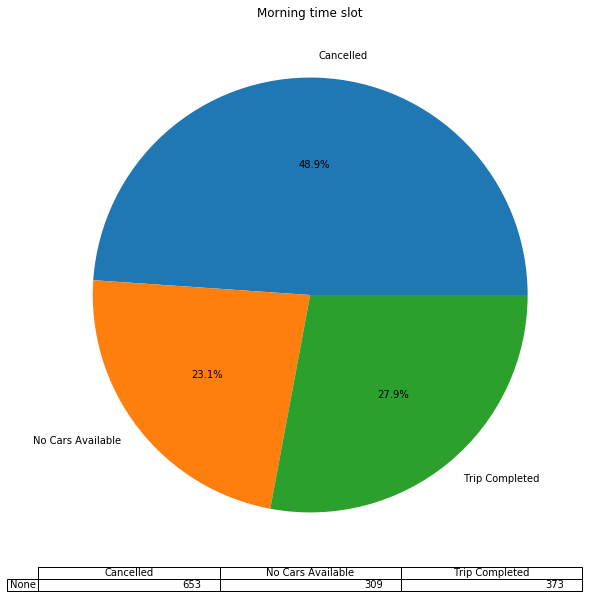

In [20]:
#Let's analyse further to see the major categories during morning hours.
#A pie chart is good option here as it will clearly show the percentages of status.
df[(df["Time Slot"]=="Morning") & (df["Pickup point"] == "City")].groupby(['Status']).size().plot(kind="pie",figsize=(10, 10),table=True,autopct='%1.1f%%',title="Morning time slot")
plt.ylabel("")
#About 49% of requests were cancelled by the drivers.

Text(0, 0.5, '')

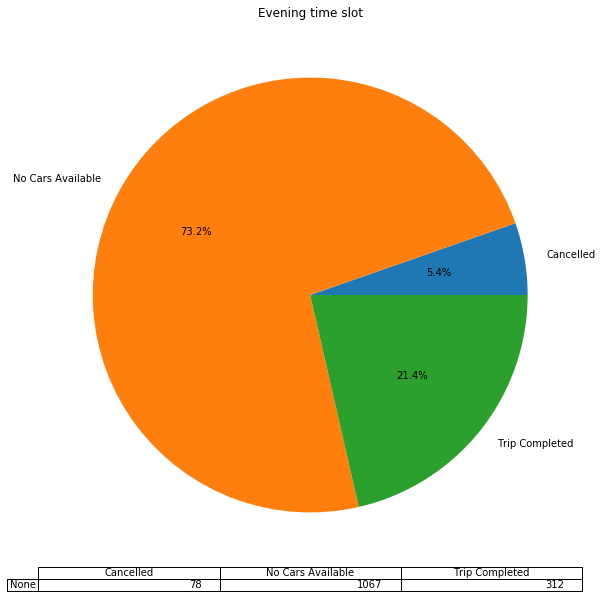

In [21]:
#Let's analyse further to see the major categories during evening hours.
#A pie chart is good option here as it will clearly show the percentages of status.
df[(df["Time Slot"]=="Evening") & (df["Pickup point"] == "Airport")].groupby(['Status']).size().plot(kind="pie",figsize=(10, 10),table=True,autopct='%1.1f%%',title="Evening time slot")
plt.ylabel("")
#About 73% of requests could not be fulfilled due to 'No Cars Available'.

In [22]:
#Reasons for Demand-Supply gap could be as below:
#Reasons for 49% cancellations during Morning hours-
#Airport could have been too far from driver's location and he would not be making enough profit out of the ride. Hence, he would have cancelled the request.
#There were no incoming flights during the morning hours. Hence there driver could not see any profits going to the airport.
#Reasons for 73% Non-availability during Evening hours-
#There were not many incoming flights scheduled during these hours. Hence not many drivers were available near Airport.
#In previous trips during that day, not many customers went to Airport. Hence, cabs were not available.


In [23]:
#Based on the above analysis, we can provide below recommendations:
#Provide better incentives to the drivers for morning and evening rides from City to Airport and Airport to City respectively.
#To avoid cancellation of rides by drives, provide 5% allowance for waiting idle at the airports.
#Provide car-pool option more frequently during peak-time hours.
#To avoid ‘No cabs available’ at the airports, increase the range for cabs search.
#Penalize the drivers in case they cancel more than 5 rides in a single day.
#Partner with other local companies in order to increase the availability of cabs during peak hours.
